In [2]:
#Import required modules
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from tensorflow.keras.models import model_from_json
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load model from .json file created after training

In [3]:
with open('saved_model/model.json', "r") as json_file:
            loaded_model_json = json_file.read()
            model = model_from_json(loaded_model_json)


# Load trained weights :

In [4]:
model.load_weights('saved_model/model_weights_trained.h5')

# Predict Emotions

In [5]:
EMOTIONS_LIST = ["Angry", "Disgust","Fear", "Happy","Neutral", "Sad", "Surprise"]

def predict_emotion(img):
        preds = model.predict(img)
        return EMOTIONS_LIST[np.argmax(preds)]


Text(0.5, 0, 'Sad')

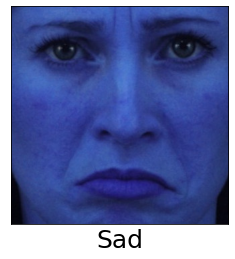

In [8]:
testimg_data_list=[]
test_img=cv2.imread('KDEF/F11SA.jpg')
    
test_img_resize=cv2.resize(test_img,(48,48))
roi=cv2.cvtColor(test_img_resize, cv2.COLOR_BGR2GRAY)
roi = roi[np.newaxis, :, :, np.newaxis]
pred = predict_emotion(roi)
#testimg_data_list.append(test_img_resize)
#testimg_data = np.array(testimg_data_list)
#testimg_data = testimg_data.astype('float32')
#testimg_data = testimg_data/255
#testimg_data.shape

#print("test image original shaape",testimg_data[0].shape)
#print("image original shaape",test_img[0].shape)

#results = model.predict(testimg_data)
plt.imshow(test_img)
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(pred, fontsize=25)

Predict real time from webcam 

In [9]:
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
video = cv2.VideoCapture(0)

while True:
    _, fr = video.read()
    gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray_fr, 1.3, 5)

    for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            roi = roi[np.newaxis, :, :, np.newaxis]
            pred = predict_emotion(roi)

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('img',fr)
    k = cv2.waitKey(1) & 0xff
    if k==ord("q"):
        break

video.release()
cv2.destroyAllWindows()